In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

In [3]:
def myDespine(ax):
    """Remove right and top lines on plots.
    """
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.spines['left'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)


In [42]:
# from fernando with original marking of accept/reject
path = '/home/cudmore/Sites/SanPy/rabbit-molar-jan-18-2022/kymSummary-jan-18-fs.xls'

# after i appended fernando accept/reject
# new version including clip window [0, 0.8]
path = '/home/cudmore/Sites/SanPy/rabbit-molar-jan-18-2022/kymSummary-jan-18.csv'

path = '/home/cudmore/Sites/SanPy/examples/kymAnalysis-20220220.csv'

saveFolder = os.path.split(path)[0]
saveName = os.path.basename(path)
saveName = os.path.splitext(saveName)[0]
print(saveName)

if path.endswith('.xls'):
    df = pd.read_excel(path)
elif path.endswith('csv'):
    df = pd.read_csv(path)
    
display(df)

kymSummary-jan-18


,Unnamed: 0,saveFolder,convertToMolar,condition,mvThreshold,meanPeak,meanPeakTime,varPeak,varPeakTime,var_at_meanPeakTime,percentChangeInPeakVal,numSpikes,file,kd,caRest,startMetaSec,stopMetaSec,LFS eval
0,0,rabbit-molar-jan-18-2022,True,Control,2.56,928.242929,0.134010,7725.409668,0.030631,2822.976213,98.0,5,1Hz_ctrl.tif,1200,125,0,0.8,Reject
1,1,rabbit-molar-jan-18-2022,True,Control,1.44,299.945916,0.303038,2815.094029,0.130475,1578.325445,83.0,9,1Hz_ctrl_0001.tif,1200,125,0,0.8,Reject
2,2,rabbit-molar-jan-18-2022,True,Control,1.28,269.857815,0.461037,334.507705,0.115259,98.409116,107.0,11,2.5Hz_ctrl_0004.tif,1200,125,0,0.8,Reject
3,3,rabbit-molar-jan-18-2022,True,Control,1.50,486.712215,0.102839,585.903737,0.072368,518.832736,89.0,13,2.5Hz_ctrl_0005.tif,1200,125,0,0.8,Accept
4,4,rabbit-molar-jan-18-2022,True,Control,1.41,463.911191,0.180896,661.554697,0.246327,483.417085,87.0,14,2.5Hz_ctrl_0006.tif,1200,125,0,0.8,Reject
5,5,rabbit-molar-jan-18-2022,True,Control,1.30,337.371614,0.223376,549.787194,0.063822,133.314811,98.0,13,2.5Hz_ctrl_0007.tif,1200,125,0,0.8,Reject
6,6,rabbit-molar-jan-18-2022,True,Control,1.51,454.821500,0.245415,1378.027156,0.061354,121.520823,93.0,8,2.5Hz_ctrl_0009.tif,1200,125,0,0.8,Accept
7,7,rabbit-molar-jan-18-2022,True,Control,1.60,393.214309,0.176647,701.728972,0.088323,306.618431,94.0,7,2.5Hz_ctrl_0010.tif,1200,125,0,0.8,Reject
8,8,rabbit-molar-jan-18-2022,True,Control,1.80,520.605727,0.254076,14589.893446,0.070359,2370.375055,94.0,7,2.5Hz_ctrl_0011.tif,1200,125,0,0.8,Reject
9,9,rabbit-molar-jan-18-2022,True,Control,1.41,482.975037,0.168767,1053.028099,0.062371,852.222657,84.0,13,2.5Hz_ctrl_0012.tif,1200,125,0,0.8,Accept


In [43]:
# remove rows where column 'LFS eval' is 'Reject'

dfPlot = df[ df['LFS eval']=='Accept']

In [44]:
aggList = ['count', 'min', 'max', 'mean', 'median', 'std', 'sem']

dfStats = dfPlot.groupby('condition')['varPeak'].agg(aggList)

display(dfStats)

,count,min,max,mean,median,std,sem
condition,,,,,,,
Control,5,214.641391,1378.027156,722.488871,585.903737,482.771277,215.901879
TG,1,18.968786,18.968786,18.968786,18.968786,NaN,NaN


<AxesSubplot:xlabel='condition', ylabel='varPeak'>

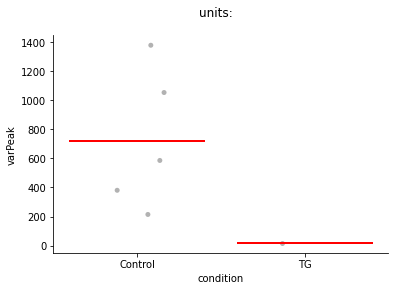

In [45]:
 convertMolarStr = ''

figVar, axsVar = plt.subplots(1, 1, sharex=False, figsize=(6, 4))
figVar.suptitle(f'units:{convertMolarStr}')
axsVar = [axsVar]
myDespine(axsVar[0])

sns.stripplot(x='condition',
    y='varPeak',
    data=dfPlot,
    alpha=0.3,
    jitter=0.2,
    color='k',
    ax=axsVar[0]);

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'r', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="condition",
            y="varPeak",
            data=dfPlot,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=axsVar[0])


In [46]:
#
saveVarFigFile = saveName + '.jpg'  # 'pooledVar-20220205.jpg'
saveVarFigPath = os.path.join(saveFolder, saveVarFigFile)
print(f'saving saveVarFigPath: {saveVarFigPath}')
figVar.savefig(saveVarFigPath, dpi=300)


saving saveVarFigPath: /home/cudmore/Sites/SanPy/rabbit-molar-jan-18-2022/kymSummary-jan-18.jpg


## 20220218 - Make new plots from my summary table I am sending to Fernando

We now include full stats for peak, height, isi

In [4]:
'''
summaryFilePath = '/home/cudmore/Sites/SanPy/rabbit-molar-jan-12-2022/kymSummary.csv'
summaryFilePath = '/home/cudmore/Sites/SanPy/rabbit-molar-jan-18-2022/kymSummary.csv'
summaryFilePath = '/home/cudmore/Sites/SanPy/rabbit-molar-feb-15-2022/kymSummary.csv'
'''

summaryFilePath = '/home/cudmore/Sites/SanPy/examples/kymAnalysis-20220220.csv'

dfSummary = pd.read_csv(summaryFilePath)

# we have a number of recording dates, each has a number of (control, TP) recordings
dateStrGroup = dfSummary.groupby(['dateStr', 'condition'])['condition'].count()
display(dateStrGroup)

display(dfSummary.head())

dateStr      condition   
feb-15-2022  Control          5
             Thapsigargin     4
jan-12-2022  Control         19
             Thapsigargin    12
jan-18-2022  Control          5
             Thapsigargin     1
Name: condition, dtype: int64

,Unnamed: 0,saveFolder,dateStr,convertToMolar,condition,mvThreshold,meanPeak,meanPeakTime,varPeak,varPeakTime,...,isi_ms_sweep,isi_ms_count,isi_ms_min,isi_ms_max,isi_ms_mean,isi_ms_median,isi_ms_sem,isi_ms_std,isi_ms_var,isi_ms_cv
0,0.0,rabbit-molar-jan-12-2022,jan-12-2022,True,Control,1.41,282.695448,0.192492,389.504709,0.062854,...,0,9,974.243,993.885,985.155,986.028,NaN,5.165,26.673,0.194
1,1.0,rabbit-molar-jan-12-2022,jan-12-2022,True,Control,1.33,343.759288,0.123995,416.877847,0.048712,...,0,5,1966.210,1975.066,1970.638,1970.638,NaN,2.801,7.844,0.357
2,2.0,rabbit-molar-jan-12-2022,jan-12-2022,True,Control,1.20,391.021728,0.207195,455.713037,0.039676,...,0,4,1961.738,1974.963,1969.453,1970.555,NaN,4.804,23.078,0.208
3,3.0,rabbit-molar-jan-12-2022,jan-12-2022,True,Control,1.28,368.023432,0.246870,250.590949,0.044084,...,0,5,1961.738,1983.780,1971.436,1970.555,NaN,7.584,57.525,0.132
4,4.0,rabbit-molar-jan-12-2022,jan-12-2022,True,Control,1.46,347.869414,0.197490,615.363577,0.049372,...,0,10,982.960,1032.332,993.283,989.692,NaN,13.621,185.542,0.073


## Ploting var from peak versus var from spike clips

<AxesSubplot:xlabel='meanPeak', ylabel='varPeak'>

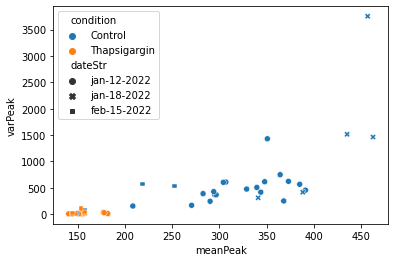

In [25]:
xStat = 'meanPeak'  # mean peak amplitude across all peaks
#yStat = 'peakVal_var'  # var measured from actual peaks (each spike has a peak)
yStat = 'varPeak'  # var measured from spike clips

sns.scatterplot(x=xStat, y=yStat, hue='condition', style='dateStr', data=dfSummary)


In [23]:
import plotly.express as px

xStat = 'meanPeak'  # mean peak amplitude across all peaks
yStat = 'varPeak'  # var measured from spike clips
#yStat = 'peakVal_var'  # var measured from actual peaks (each spike has a peak)

fig = px.scatter(dfSummary, x=xStat, y=yStat,
                color='condition',
                symbol='dateStr',
                hover_data=['dateStr'])
fig.show()

In [24]:
# examine % change from start to stop of kymograph, does it predict variance of peaks?

xStat = 'percentChangeInPeakVal'
#yStat = 'peakVal_var'  # var measured from actual peaks (each spike has a peak)
yStat = 'varPeak'  # var measured from spike clips

fig = px.scatter(dfSummary, x=xStat, y=yStat,
                color='condition',
                symbol='dateStr',
                size='meanPeak',
                 hover_data=['dateStr'])
fig.show()

In [66]:
def plotSummary(yStat, axs=None):
    if axs is None:
        #convertMolarStr = '???'
        fig, axs = plt.subplots(1, 1, sharex=False, figsize=(6, 4));
        #fig.suptitle(f'units:{convertMolarStr}');
        #axs = [axs]
    
    myDespine(axs)

    #yStat = 'peakVal_cv'

    sns.stripplot(x='condition',
        y=yStat,
        data=dfSummary,
        alpha=0.3,
        jitter=0.2,
        color='k',
        ax=axs);

    sns.boxplot(showmeans=True,
                meanline=True,
                meanprops={'color': 'r', 'ls': '-', 'lw': 2},
                medianprops={'visible': False},
                whiskerprops={'visible': False},
                zorder=10,
                x="condition",
                y=yStat,
                data=dfSummary,
                showfliers=False,
                showbox=False,
                showcaps=False,
                ax=axs);
    
    return figVar, axsVar


"\nyStat = 'peakVal_var'\nplotSummary(yStat, axs=axs[1]);\n\nyStat = 'peakHeight_var'\nplotSummary(yStat, axs=axs[2]);\n"

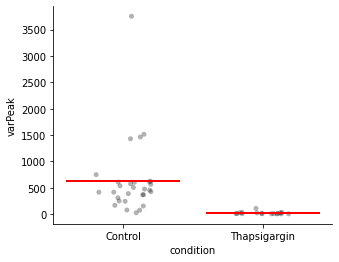

In [71]:
#fig, axs = plt.subplots(1, 3, sharex=False, figsize=(10, 4));

fig, axs = plt.subplots(1, 1, sharex=False, figsize=(5, 4));
axs = [axs]

yStat = 'varPeak'
plotSummary(yStat, axs=axs[0]);

'''
yStat = 'peakVal_var'
plotSummary(yStat, axs=axs[1]);

yStat = 'peakHeight_var'
plotSummary(yStat, axs=axs[2]);
'''


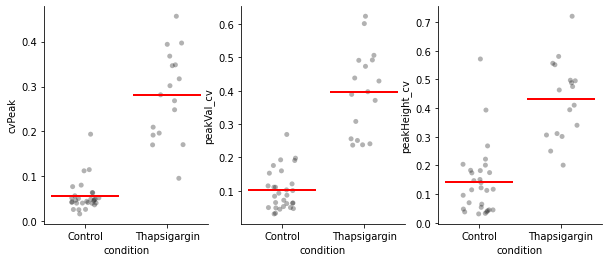

In [68]:
# what if we normalize the std of peak to mean peak (e.g. CV of peak)
fig, axs = plt.subplots(1, 3, sharex=False, figsize=(10, 4));

yStat = 'cvPeak'
plotSummary(yStat, axs=axs[0]);

yStat = 'peakVal_cv'
plotSummary(yStat, axs=axs[1]);

yStat = 'peakHeight_cv'
plotSummary(yStat, axs=axs[2]);



My variance measured as "max in spike clips" is significantly larger than my "variance measured at peak"

My impression is that the variance measured as macx across spike clips is an overestimate as it depends on getting the threshold (take-off-potential) aligned perfectly which is often not the case


In [19]:
# ask if my "variance from peak" is different from "variance from max in clips"
varPeak = 'varPeak'  # var measured from spike clips
peakVal_var = 'peakVal_var'  # var measured from actual peaks (each spike has a peak)

varPeakValues = dfSummary['varPeak'].values
peakVal_var_values = dfSummary['peakVal_var'].values

diffPeak = varPeakValues - peakVal_var_values
print(diffPeak)

import scipy.stats

p = scipy.stats.mannwhitneyu(varPeakValues, peakVal_var_values)
print(p)

[ 3.62094709e+02  2.75025847e+02  4.28796037e+02  2.07719949e+02
  3.64045577e+02  7.95742702e+01  5.41502357e+02  1.39095051e+03
  2.82172969e+02  1.28093600e+02  3.00618427e+02  2.86127408e+02
  3.42326929e+02  5.15265173e+02  2.45409648e+02  3.68550632e+02
  7.35864384e+01  1.71747514e+02  7.06397977e+01  2.31141854e+00
  3.34596016e-01  1.93583347e+01  3.03599081e+00  1.99609661e+00
  3.57864993e+00  6.62666889e+00  1.65734666e+01  6.83089432e+00
  9.54722140e+00  7.17052736e+00  4.81935281e+00  1.01982248e+03
  1.38411837e+03  2.82659191e+03 -7.42996603e+02  1.71339006e+02
 -1.04272828e+00  1.51100352e+02  5.38427039e+01  4.35838478e+01
  1.28202544e+01  3.54621426e+01 -5.29337193e+00  1.88797576e+01
  2.40519985e+01  9.35018957e+01]
MannwhitneyuResult(statistic=1404.0, pvalue=0.006976079484916705)


## Check inter-spike-interval

In [20]:
dfSummary.columns

Index(['Unnamed: 0', 'saveFolder', 'dateStr', 'convertToMolar', 'condition',
       'mvThreshold', 'meanPeak', 'meanPeakTime', 'varPeak', 'varPeakTime',
       'sdPeak', 'cvPeak', 'percentChangeInPeakVal', 'numSpikes', 'file', 'kd',
       'caRest', 'startMetaSec', 'stopMetaSec', 'peakVal_sweep',
       'peakVal_count', 'peakVal_min', 'peakVal_max', 'peakVal_mean',
       'peakVal_median', 'peakVal_sem', 'peakVal_std', 'peakVal_var',
       'peakVal_cv', 'peakHeight_sweep', 'peakHeight_count', 'peakHeight_min',
       'peakHeight_max', 'peakHeight_mean', 'peakHeight_median',
       'peakHeight_sem', 'peakHeight_std', 'peakHeight_var', 'peakHeight_cv',
       'isi_ms_sweep', 'isi_ms_count', 'isi_ms_min', 'isi_ms_max',
       'isi_ms_mean', 'isi_ms_median', 'isi_ms_sem', 'isi_ms_std',
       'isi_ms_var', 'isi_ms_cv'],
      dtype='object')

In [21]:
xStat = 'isi_ms_mean'  
yStat = 'isi_ms_cv'  

fig = px.scatter(dfSummary, x=xStat, y=yStat,
                color='condition',
                symbol='dateStr',
                hover_data=['dateStr'])
fig.show()

In [30]:
xStat = 'isi_ms_mean'  
#yStat = 'isi_ms_cv'  
yStat = 'varPeak'  # var measured from spike clips


#xStat = 'varPeak'  # var measured from spike clips
#xStat = 'meanPeak'  # mean peak amplitude across all peaks
#yStat = 'peakVal_var'  # var measured from actual peaks (each spike has a peak)

fig = px.scatter(dfSummary, x=xStat, y=yStat,
                color='condition',
                symbol='dateStr',
                error_x = 'isi_ms_std',
                 hover_data=['dateStr'])
fig.show()